# Analyzing data from WANDB

In [1]:
import wandb
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

api = wandb.Api()
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

The above is an empty-appearing cell that has to be run...

In [10]:
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

# Create an empty list to store the EIG data for each run
eig_data = []

# Iterate through each run and extract the EIG data
for run in runs:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    eig_col = run_data["EIG"]
    eig_data.append(eig_col)

# Concatenate the EIG data for all runs into a single DataFrame
eig_df = pd.concat(eig_data, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
eig_mean = eig_df.mean(axis=1)
eig_std = eig_df.std(axis=1)

In [11]:
runs = api.runs("vz_uci/lfiax10D_linReg_ICML")

# Create an empty list to store the EIG data for each run
eig_data_10D = []

# Iterate through each run and extract the EIG data
for run in runs:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    eig_col = run_data["EIG"]
    eig_data_10D.append(eig_col)

# Concatenate the EIG data for all runs into a single DataFrame
eig_df_10D = pd.concat(eig_data_10D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
eig_mean_10D = eig_df_10D.mean(axis=1)
eig_std_10D = eig_df_10D.std(axis=1)

In [12]:
runs = api.runs("vz_uci/lfiax100D_linReg_ICML")

# Create an empty list to store the EIG data for each run
eig_data_100D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    eig_col = run_data["EIG"]
    eig_data_100D.append(eig_col)

# Concatenate the EIG data for all runs into a single DataFrame
eig_df_100D = pd.concat(eig_data_100D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
eig_mean_100D = eig_df_100D.mean(axis=1)
eig_std_100D = eig_df_100D.std(axis=1)

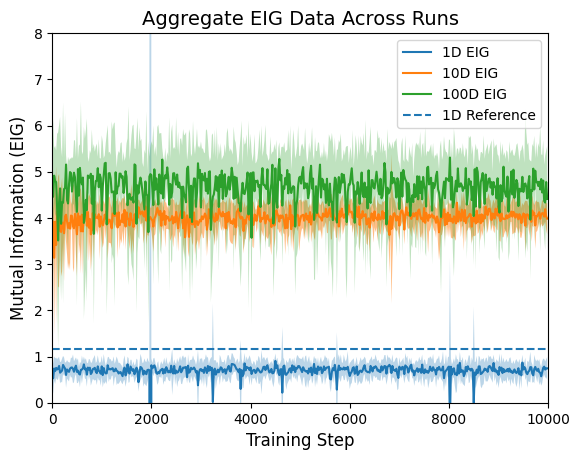

In [13]:
xaxey = np.arange(0, 10000, 20)

fig, ax = plt.subplots()
ax.plot(xaxey, eig_mean.values, label="1D EIG")
ax.plot(xaxey, eig_mean_10D.values, label="10D EIG")
ax.plot(xaxey, eig_mean_100D.values, label="100D EIG")
ax.fill_between(xaxey, eig_mean.values - eig_std.values, eig_mean.values + eig_std.values, alpha=0.3)
ax.fill_between(xaxey, eig_mean_10D.values - eig_std_10D.values, eig_mean_10D.values + eig_std_10D.values, alpha=0.5)
ax.fill_between(xaxey, eig_mean_100D.values - eig_std_100D.values, eig_mean_100D.values + eig_std_100D.values, alpha=0.3)
ax.set_xlabel("Training Step", fontsize=12)
ax.set_ylabel("Mutual Information (EIG)", fontsize=12)
ax.set_title("Aggregate EIG Data Across Runs", fontsize=14)
ax.axhline(y=1.17, linestyle="--", label="1D Reference")
ax.legend()
ax.set_ylim(0., 8.)
ax.set_xlim(0., 10000)

fig.savefig("lin_reg_MI.svg", format="svg")

plt.show()

## Getting optimal experimental designs

In [120]:
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

# Create an empty list to store the EIG data for each run
xi_data_1D = []

# Iterate through each run and extract the EIG data
for run in runs:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_1D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_1D = pd.concat(xi_data_1D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
# xi_mean_100D = xi_df_100D.mean(axis=1)
# xi_std_100D = xi_df_100D.std(axis=1)

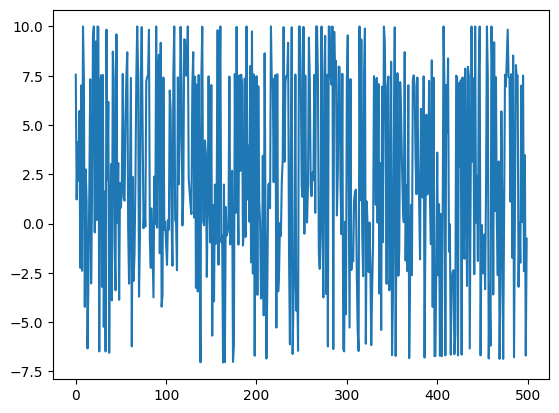

In [121]:
plt.plot(xi_df_1D.iloc[:,2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


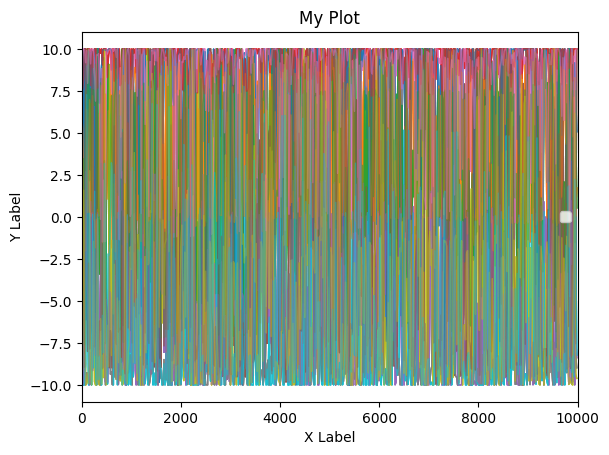

In [ ]:
# plot each column as its own line
fig, ax = plt.subplots()
for col in xi_df_1D.columns:
    ax.plot(xaxey, xi_df_1D[col], linewidth=1, alpha=0.3)

# set plot title, legend, and axis labels
ax.set_title('My Plot')
ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_xlim(0., 10000)

# show the plot
plt.show()

In [6]:
runs = api.runs("vz_uci/lfiax1D_linReg_ICML2")

# Create an empty list to store the EIG data for each run
xi_data_1D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_1D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_1D = pd.concat(xi_data_1D, axis=1)

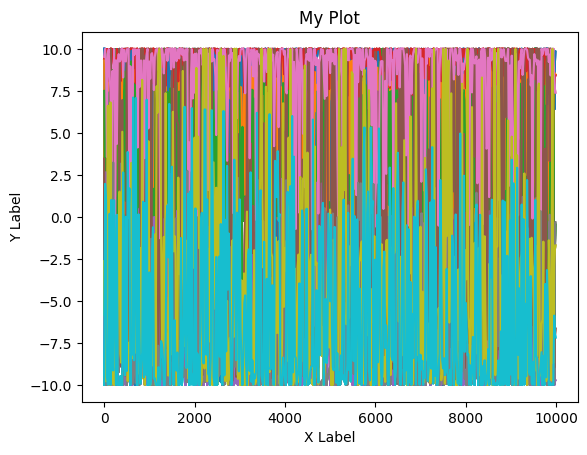

In [7]:
# plot each column as its own line
fig, ax = plt.subplots()
for col in xi_df_1D.columns:
    ax.plot(xaxey, xi_df_1D[col], label=col)

# set plot title, legend, and axis labels
ax.set_title('My Plot')
# ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# show the plot
plt.show()

In [2]:
runs = api.runs("vz_uci/lfiax10D_linReg_ICML")

# Create an empty list to store the EIG data for each run
xi_data_10D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_10D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_10D = pd.concat(xi_data_10D, axis=1)

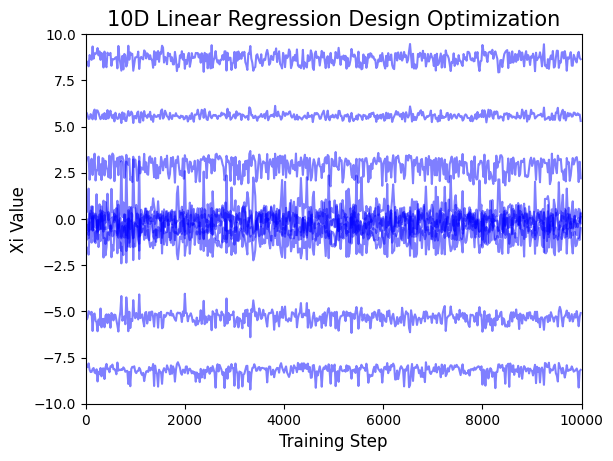

In [8]:
# create a figure and axis object
fig, ax = plt.subplots()

xaxey = np.arange(0, 10000, 20)

# loop through each dimension of the array and plot it as a line
for i in range(10):
    ax.plot(xaxey, xi_df_10D.iloc[:,4].apply(lambda x: x[i]), color='blue', alpha=0.5)

# set plot title, legend, and axis labels
ax.set_title('10D Linear Regression Design Optimization', fontsize=15)
# ax.legend(range(1, 11))
ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Xi Value', fontsize=12)
ax.set_ylim(-10., 10.)
ax.set_xlim(0., 10000.)

fig.savefig("10D_designs.svg", format="svg")

# show the plot
plt.show()


In [ ]:
runs = api.runs("vz_uci/lfiax100D_linReg_ICML")

# Create an empty list to store the EIG data for each run
xi_data_100D = []

# Iterate through each run and extract the EIG data
for run in runs[:10]:
    # Get the history data for the run
    run_data = run.history()
    
    # Extract the EIG column and append it to the list
    xi_col = run_data["xi"]
    xi_data_100D.append(xi_col)

# Concatenate the EIG data for all runs into a single DataFrame
xi_df_100D = pd.concat(xi_data_100D, axis=1)

# Compute the mean and standard deviation of the EIG values across all runs
# xi_mean_100D = xi_df_100D.mean(axis=1)
# xi_std_100D = xi_df_100D.std(axis=1)

# Analyzing local data from CSV files

In [ ]:
# import os
# import shutil

# def merge_directories(src_root, dst_root):
#     if not os.path.exists(dst_root):
#         os.makedirs(dst_root)

#     for root, dirs, files in os.walk(src_root):
#         for d in dirs:
#             src_dir = os.path.join(root, d)
#             dst_dir = os.path.join(dst_root, os.path.relpath(src_dir, src_root))

#             if not os.path.exists(dst_dir):
#                 os.makedirs(dst_dir)

#         for f in files:
#             if f == "log.csv":
#                 src_file = os.path.join(root, f)
#                 dst_file = os.path.join(dst_root, os.path.relpath(src_file, src_root))

#                 if not os.path.exists(dst_file):
#                     shutil.copy2(src_file, dst_file)

# src_root1 = "neurips"
# src_root2 = "neurips 2"
# dst_root = "neurips_merged"

# merge_directories(src_root1, dst_root)
# merge_directories(src_root2, dst_root)


## Importing data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

def read_csv_file(filepath):
    try:
        df = pd.read_csv(filepath, error_bad_lines=False)
    except pd.errors.ParserError as e:
        print(f"Error reading file {filepath}: {e}")
        return None
    return df

def process_directory(root_dir, parent_dirs, lambda_dirs):
    dfs = []
    for parent_dir in parent_dirs:
        for lambda_dir in lambda_dirs:
            for subdir in ['1', '10', '100']:
                for root, dirs, files in os.walk(os.path.join(root_dir, parent_dir, lambda_dir, subdir)):
                    for file in files:
                        if file == 'log.csv':
                            filepath = os.path.join(root, file)
                            
                            df = read_csv_file(filepath)
                            if df is not None:
                                seed = root.split('/')[-2]
                                df['seed'] = seed
                                df['boed_type'] = parent_dir
                                df['num_designs'] = subdir
                                df['lambda_subdir'] = lambda_dir
                                dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# root_dir = 'neurips_linear'
root_dir = 'icml_linear'
# parent_dirs = ['pce_lin_reg', 'snpe_pce_lin_reg']
parent_dirs = ['pce_lin_reg']
lambda_dirs = ['eig_lambda_0-0', 'eig_lambda_0-5', 'eig_lambda_1-0']
final_df = process_directory(root_dir, parent_dirs, lambda_dirs)


/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_29087/3958717788.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, error_bad_lines=False)
/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_29087/3958717788.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, error_bad_lines=False)
/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_29087/3958717788.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath, error_bad_lines=False)
/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_29087/3958717788.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future ver

In [2]:
final_df.shape

(900000, 9)

In [4]:
final_df.head()

STEP           Xi          Loss           EIG       time seed    boed_type  \
0     0  [3.1422853] -1.251697e-07  1.251697e-07  56.387145    9  pce_lin_reg   
1     1  [3.0678728] -1.423986e-01  1.423986e-01   0.148419    9  pce_lin_reg   
2     2   [2.985728] -2.083961e-01  2.083961e-01   0.140050    9  pce_lin_reg   
3     3  [3.0010433] -3.354581e-01  3.354581e-01   0.140196    9  pce_lin_reg   
4     4  [3.0098689] -4.122032e-01  4.122032e-01   0.140031    9  pce_lin_reg   

  num_designs   lambda_subdir  
0           1  eig_lambda_0-0  
1           1  eig_lambda_0-0  
2           1  eig_lambda_0-0  
3           1  eig_lambda_0-0  
4           1  eig_lambda_0-0

In [5]:
df = final_df[final_df['num_designs'] == '1']


In [6]:
df.shape

(300000, 9)

/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_29087/3765823034.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Xi'] = df['Xi'].apply(extract_float)


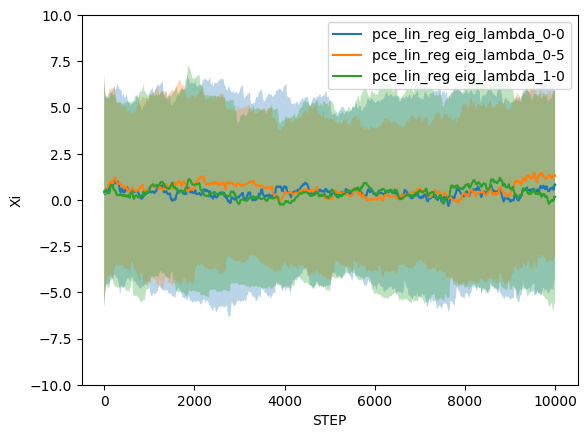

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Assuming df is your pandas DataFrame

# Define a helper function to extract float from the string representation of an array
def extract_float(arr_string):
    float_str = re.search(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', arr_string).group()
    return float(float_str)

# Convert the 'Xi' column to a numeric type
df['Xi'] = df['Xi'].apply(extract_float)

# Group the data by 'boed_type', 'lambda_subdir', 'STEP' and compute mean and std of 'Xi' column
grouped = df.groupby(['boed_type', 'lambda_subdir', 'STEP'])['Xi'].agg(['mean', 'std']).reset_index()

# Create a line plot with fill_between for each 'boed_type' and 'lambda_subdir'
fig, ax = plt.subplots()

for (boed_type, lambda_subdir), group in grouped.groupby(['boed_type', 'lambda_subdir']):
    ax.plot(group['STEP'], group['mean'], label=f'{boed_type} {lambda_subdir}')
    ax.fill_between(group['STEP'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.3)

ax.set_xlabel('STEP')
ax.set_ylabel('Xi')
ax.set_ylim([-10, 10])
ax.legend()

plt.show()


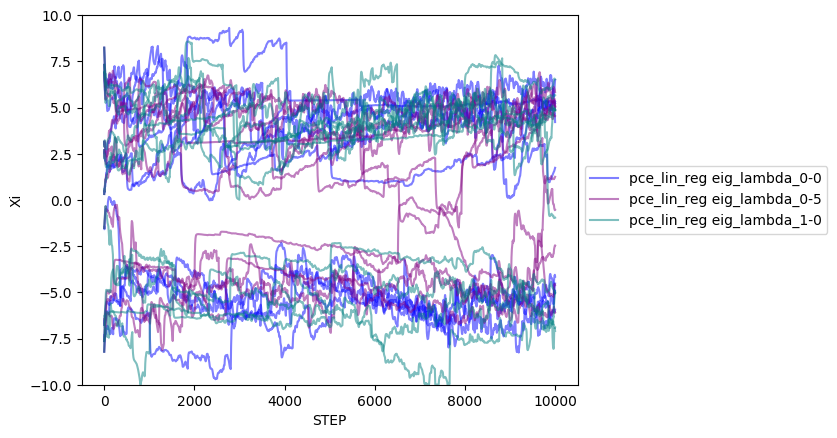

In [8]:
# Create a line plot with faded alpha value for each 'boed_type', 'lambda_subdir', and 'seed'
fig, ax = plt.subplots()

alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'eig_lambda_0-0'): 'blue',
    ('pce_lin_reg', 'eig_lambda_0-5'): 'purple',
    ('pce_lin_reg', 'eig_lambda_1-0'): 'teal',
    ('snpe_pce_lin_reg', 'eig_lambda_0-0'): 'red',
    ('snpe_pce_lin_reg', 'eig_lambda_0-5'): 'orange',
    ('snpe_pce_lin_reg', 'eig_lambda_1-0'): 'pink',
    # ('snpe_pce_lin_reg', 'real_lambda_1'): 'yellow',
    # Add more pairs as needed with their corresponding colors
}

for (boed_type, lambda_subdir), group in df.groupby(['boed_type', 'lambda_subdir']):
    for _, seed_group in group.groupby('seed'):
        ax.plot(seed_group['STEP'], seed_group['Xi'], label=f'{boed_type} {lambda_subdir}', color=color_map[(boed_type, lambda_subdir)], alpha=alpha_value)

ax.set_xlabel('STEP')
ax.set_ylabel('Xi')

# Remove duplicates from the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for i, label in enumerate(labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handles[i])

ax.legend(unique_handles, unique_labels, loc="center left", bbox_to_anchor=(1, 0.5))
# ax.legend(["Data"], loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim([-10, 10])

plt.show()


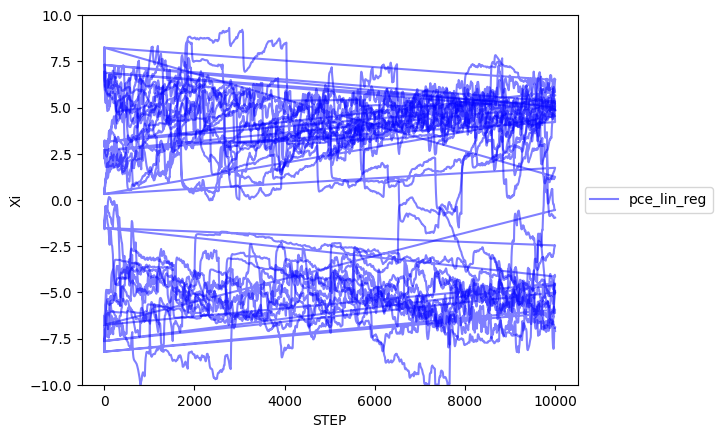

In [9]:
# Create a line plot with faded alpha value for each 'boed_type', 'lambda_subdir', and 'seed'
fig, ax = plt.subplots()

alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type'
color_map = {
    'pce_lin_reg': 'blue',
    'snpe_pce_lin_reg': 'red',
    # Add more 'boed_type' with their corresponding colors
}

for boed_type, group in df.groupby('boed_type'):
    for _, seed_group in group.groupby('seed'):
        ax.plot(seed_group['STEP'], seed_group['Xi'], label=f'{boed_type}', color=color_map[boed_type], alpha=alpha_value)

ax.set_xlabel('STEP')
ax.set_ylabel('Xi')

# Remove duplicates from the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for i, label in enumerate(labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handles[i])

ax.legend(unique_handles, unique_labels, loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_ylim([-10, 10])


plt.show()


## Comparing the EIG

/var/folders/j7/tj9yr2g9655ccsm2fwyzbxv40000gn/T/ipykernel_29087/3881014682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EIG'] = df['EIG'].astype(float)


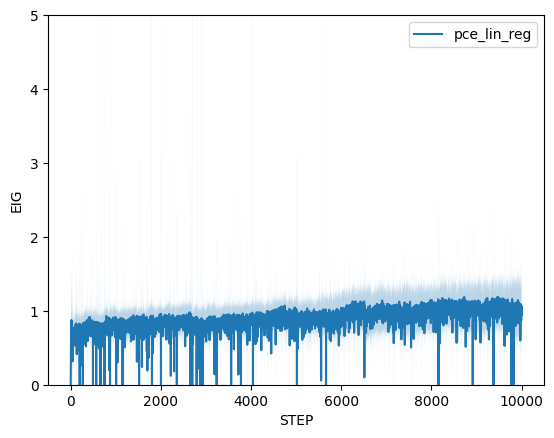

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Convert the 'EIG' column to a numeric type
df['EIG'] = df['EIG'].astype(float)

# Group the data by 'boed_type', 'STEP' and compute mean and std of 'EIG' column
grouped = df.groupby(['boed_type', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a line plot with fill_between for each 'boed_type'
fig, ax = plt.subplots()

for boed_type, group in grouped.groupby('boed_type'):
    ax.plot(group['STEP'], group['mean'], label=f'{boed_type}')
    ax.fill_between(group['STEP'], group['mean'] - group['std'], group['mean'] + group['std'], alpha=0.3)

ax.set_xlabel('STEP')
ax.set_ylabel('EIG')
ax.set_ylim([0., 5])
ax.legend()

plt.show()


In [ ]:
def extract_float(arr_string):
    float_str = re.search(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', arr_string).group()
    return float(float_str)

# Convert the 'Xi' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype('string').apply(extract_float)

In [16]:
# convert the 'age' column to float and replace invalid values with NaN
final_df['EIG'] = pd.to_numeric(final_df['EIG'], errors='coerce')

# use boolean indexing to isolate rows with NaN values
invalid_rows = final_df['EIG'].isna()
print(final_df[invalid_rows]['STEP'])

610039        -9.104374   -4.5554266  -7.828384   -2.0865743
610040      -7.2779713   6.406623   -1.7848574   2.771556...
610041       8.896487   -3.9341564   4.1774635   0.736564...
610042       2.8860304   4.029966    6.91242     6.989794...
610043      -2.229268   -8.720145    5.0659666  -5.599205...
                                 ...                        
2010152       9.147623    6.4527392   0.44058776  9.76556...
2010312                                -0.39344037  9.464737
2010515                                         476936340332
2010561                                            14.076991
2010700                                             6.349552
Name: STEP, Length: 33369, dtype: object


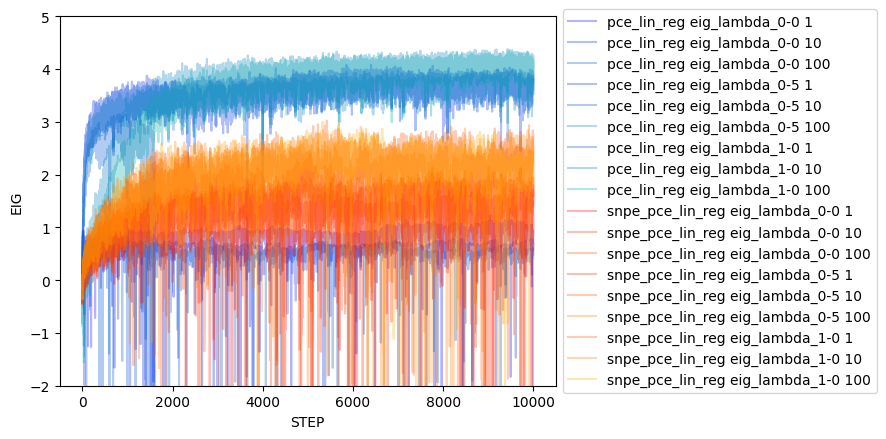

In [63]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Convert the 'EIG' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype(float)

# Group the data by 'boed_type', 'lambda_subdir', 'num_designs', 'STEP' and compute mean and std of 'EIG' column
grouped = final_df.groupby(['boed_type', 'lambda_subdir', 'num_designs', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a line plot for each 'boed_type'
fig, ax = plt.subplots()

# Define colormaps for each 'boed_type'
colormaps = {
    'pce_lin_reg': cm.winter,
    'snpe_pce_lin_reg': cm.autumn,
}

for (boed_type, lambda_subdir, num_designs), group in grouped.groupby(['boed_type', 'lambda_subdir', 'num_designs']):
    # Pick a color from the colormap based on 'lambda_subdir' and 'num_designs'
    color = colormaps[boed_type]((np.unique(grouped['lambda_subdir']).tolist().index(lambda_subdir) + 
                                  np.unique(grouped['num_designs']).tolist().index(num_designs)) / 
                                  (len(np.unique(grouped['lambda_subdir'])) + len(np.unique(grouped['num_designs']))))

    ax.plot(group['STEP'], group['mean'], label=f'{boed_type} {lambda_subdir} {num_designs}', color=color, alpha=0.3)

ax.set_xlabel('STEP')
ax.set_ylabel('EIG')
ax.set_ylim([-2., 5])

handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for i, label in enumerate(labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handles[i])

ax.legend(unique_handles, unique_labels, loc="center left", bbox_to_anchor=(1, 0.5))

# ax.legend()


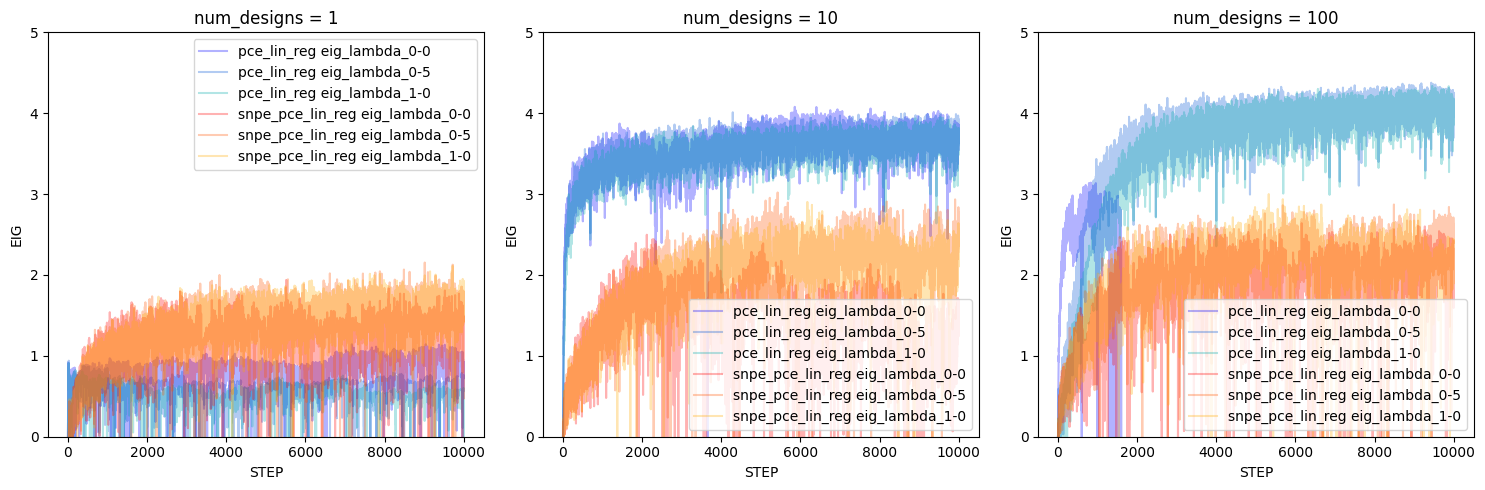

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Convert the 'EIG' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype(float)

# Group the data by 'boed_type', 'lambda_subdir', 'num_designs', 'STEP' and compute mean and std of 'EIG' column
grouped = final_df.groupby(['boed_type', 'lambda_subdir', 'num_designs', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colormaps for each 'boed_type'
colormaps = {
    'pce_lin_reg': cm.winter,
    'snpe_pce_lin_reg': cm.autumn,
}

# List of unique 'num_designs'
num_designs_list = np.unique(grouped['num_designs'])

for ax, num_designs in zip(axes, num_designs_list):
    # Subset of the data for the current 'num_designs'
    subgroup = grouped[grouped['num_designs'] == num_designs]

    for (boed_type, lambda_subdir), group in subgroup.groupby(['boed_type', 'lambda_subdir']):
        # Pick a color from the colormap based on 'lambda_subdir'
        color = colormaps[boed_type](np.unique(subgroup['lambda_subdir']).tolist().index(lambda_subdir) / len(np.unique(subgroup['lambda_subdir'])))

        ax.plot(group['STEP'], group['mean'], label=f'{boed_type} {lambda_subdir}', color=color, alpha=0.3)

    ax.set_title(f'num_designs = {num_designs}')
    ax.set_xlabel('STEP')
    ax.set_ylabel('EIG')
    ax.set_ylim([0., 5])
    ax.legend()

plt.tight_layout()


KeyError: 'LF-PCE'

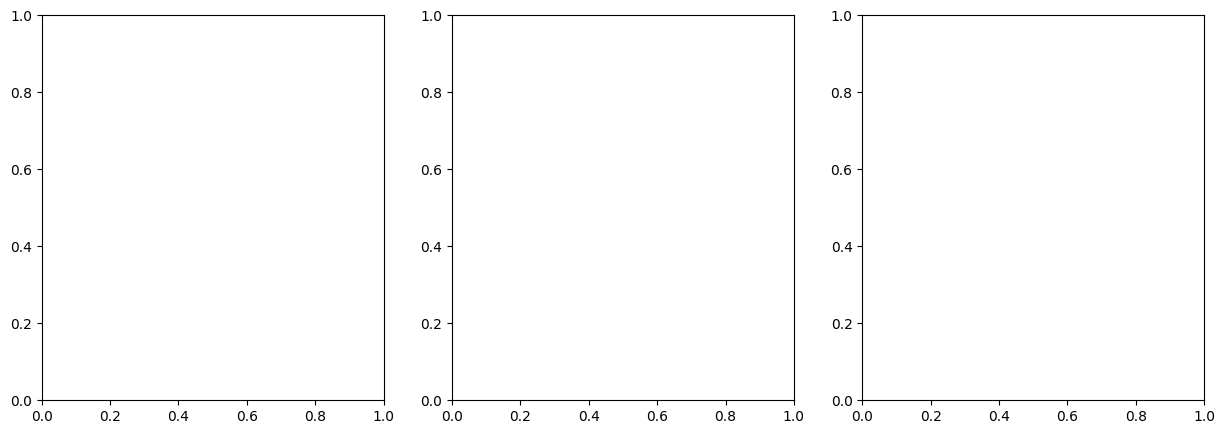

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Convert the 'EIG' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype(float)

# Group the data by 'boed_type', 'lambda_subdir', 'num_designs', 'STEP' and compute mean and std of 'EIG' column
grouped = final_df.groupby(['boed_type', 'lambda_subdir', 'num_designs', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colormaps for each 'boed_type'
colormaps = {
    'pce_lin_reg': cm.winter,
    'snpe_pce_lin_reg': cm.autumn,
}

# List of unique 'num_designs'
num_designs_list = np.unique(grouped['num_designs'])

for ax, num_designs in zip(axes, num_designs_list):
    # Subset of the data for the current 'num_designs'
    subgroup = grouped[grouped['num_designs'] == num_designs]

    for (boed_type, lambda_subdir), group in subgroup.groupby(['boed_type', 'lambda_subdir']):
        # Pick a color from the colormap based on 'lambda_subdir'
        color = colormaps[boed_type](np.unique(subgroup['lambda_subdir']).tolist().index(lambda_subdir) / len(np.unique(subgroup['lambda_subdir'])))

        # Compute the moving average of the last 100 samples
        group['mean'] = group['mean'].rolling(window=100).mean()

        ax.plot(group['STEP'], group['mean'], label=f'{boed_type} {lambda_subdir}', color=color, alpha=0.5)

    ax.set_title(f'num_designs = {num_designs}')
    ax.set_xlabel('STEP')
    ax.set_ylabel('EIG')
    ax.set_ylim([0., 5.])
    ax.legend()

plt.tight_layout()


In [87]:
# Convert the 'EIG' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype(float)

# Map 'boed_type' and 'lambda_subdir' to new values
boed_type_map = {'pce_lin_reg': 'LF-PCE', 'snpe_pce_lin_reg': 'NP-PCE'}
final_df['boed_type'] = final_df['boed_type'].map(boed_type_map)

lambda_subdir_map = {name: float(name.split('_')[-1].replace('-', '.')) for name in final_df['lambda_subdir'].unique()}
final_df['lambda_subdir'] = final_df['lambda_subdir'].map(lambda_subdir_map)


NOTE: The following depends on the previous pre-processing of the `final_df` dataframe. 

In [11]:
# Convert the 'EIG' column to a numeric type
final_df['EIG'] = final_df['EIG'].astype(float)

# Map 'boed_type' to new values
boed_type_map = {'pce_lin_reg': 'LF-PCE', 'snpe_pce_lin_reg': 'NP-PCE'}
final_df['boed_type'] = final_df['boed_type'].map(boed_type_map)

In [12]:
# Extract the numeric values from 'lambda_subdir' column
final_df['lambda_value'] = final_df['lambda_subdir'].apply(lambda x: float(x.split('_')[-1].replace('-', '.')))

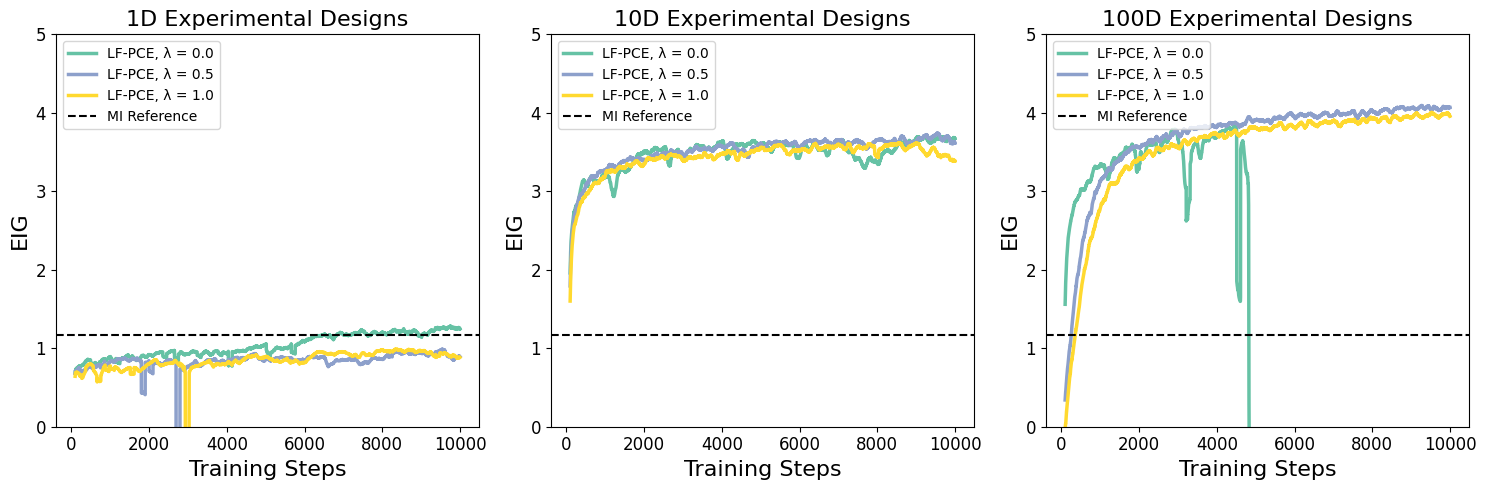

In [26]:
# Group the data by 'boed_type', 'lambda_value', 'num_designs', 'STEP' and compute mean and std of 'EIG' column
grouped = final_df.groupby(['boed_type', 'lambda_value', 'num_designs', 'STEP'])['EIG'].agg(['mean', 'std']).reset_index()

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
""
# Define colormaps for each 'boed_type'
colormaps = {
    'LF-PCE': cm.Set2,
    'NP-PCE': cm.autumn,  # Change to your preferred colormap
}

# List of unique 'num_designs'
num_designs_list = np.unique(grouped['num_designs'])

for i, (ax, num_designs) in enumerate(zip(axes, num_designs_list)):
    # Subset of the data for the current 'num_designs'
    subgroup = grouped[grouped['num_designs'] == num_designs]

    for (boed_type, lambda_value), group in subgroup.groupby(['boed_type', 'lambda_value']):
        # Pick a color from the colormap based on 'lambda_value'
        color = colormaps[boed_type](np.unique(subgroup['lambda_value']).tolist().index(lambda_value) / len(np.unique(subgroup['lambda_value'])))

        # Compute the moving average of the last 100 samples
        group['mean'] = group['mean'].rolling(window=100).mean()

        ax.plot(group['STEP'], group['mean'], label=f'{boed_type}, \u03BB = {lambda_value}', color=color, linewidth=2.5)

    if i == 0:
        ax.axhline(y=1.171, color='black', linestyle='--', label='MI Reference')
        ax.set_ylabel('EIG', fontsize=16)
    elif i == 1:
        ax.axhline(y=1.17, color='black', linestyle='--', label='MI Reference')
        ax.set_ylabel('EIG', fontsize=16)
    else:
        ax.axhline(y=1.17, color='black', linestyle='--', label='MI Reference')
        ax.set_ylabel('EIG', fontsize=16)

    ax.set_title(f"{num_designs}D Experimental Designs", fontsize=16)
    ax.set_xlabel('Training Steps', fontsize=16)
    ax.set_ylim([0., 5])
    ax.legend(loc='upper left')

    # Increase the font size of x-axis tick labels
    ax.tick_params(axis='x', labelsize=12)

    # Increase the font size of y-axis tick labels
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()

plt.savefig('linear_eig_new.png', dpi=900) 

# Plotting the posteriors

How do I do this?
1. Need a net with the trained conditions (will need to use the HPC for big ones). 
2. Use that net to get posterior values and plot out prior vs. posterior plots. Have to use SIR for likelihood-based plots.

That's it. And have to do that for each of the $\lambda$ values. That's a lot of plotting. What if, instead, you make a plot with the mean plus/minus the stddev? Yea, think that'd work great.

## 1D posteriors

In [63]:
import pickle as pkl

# Unpickling the weights and optimizer state to check things out
# Load the objects.
with open("SNPE_best_1D_params.pkl", "rb") as f:
    loaded_objects = pkl.load(f)

# Retrieve the loaded objects.
post_params = loaded_objects['flow_params']
xi_params = loaded_objects['xi_params']
# loaded_optimizer1_state = loaded_objects['optimizer1']
# loaded_optimizer2_state = loaded_objects['optimizer2']


In [65]:
xi_params['xi'].shape[0]

10

Which ones to do? I can do the ons that get the max EIG or the lowest loss. Yea I think lowest loss is a good tradeoff.

In [135]:
# Step 1: Sort the dataframe
df = final_df.sort_values(by='STEP', ascending=False)

# Step 2: Group by 'num_designs', 'seed', 'lambda_value', and 'boed_type', and get the top 100 rows for each group
df_grouped = df.groupby(['num_designs', 'seed', 'lambda_value', 'boed_type']).apply(lambda x: x.head(100)).reset_index(drop=True)

# Step 3: For each group, calculate the average 'Loss' value
avg_loss = df_grouped.groupby(['num_designs', 'seed', 'lambda_value', 'boed_type'])['Loss'].mean()

# Step 4: For each 'num_designs' and 'boed_type', find the 'seed' and 'lambda_value' with the minimum average 'Loss'
idx = avg_loss.groupby(['num_designs', 'boed_type']).idxmin()

# idx is a series with ('num_designs', 'boed_type') as index and the ('num_designs', 'seed', 'lambda_value', 'boed_type') tuple that 
# has the minimum average 'Loss' as value. 
# If you want a dictionary with ('num_designs', 'boed_type') as keys and ('seed', 'lambda_value') as values:
best_seeds_lambdas = {(num_designs, boed_type): (seed, lambda_value) for (num_designs, boed_type), (_, seed, lambda_value, _) in idx.items()}


In [136]:
for (num_designs, boed_type), (seed, lambda_value) in best_seeds_lambdas.items():
    print(f"For num_designs={num_designs} and boed_type={boed_type}, the best seed is {seed} and the best lambda_value is {lambda_value}")


For num_designs=1 and boed_type=LF-PCE, the best seed is 10 and the best lambda_value is 0.0
For num_designs=1 and boed_type=NP-PCE, the best seed is 10 and the best lambda_value is 1.0
For num_designs=10 and boed_type=LF-PCE, the best seed is 7 and the best lambda_value is 0.0
For num_designs=10 and boed_type=NP-PCE, the best seed is 3 and the best lambda_value is 1.0
For num_designs=100 and boed_type=LF-PCE, the best seed is 5 and the best lambda_value is 0.0
For num_designs=100 and boed_type=NP-PCE, the best seed is 8 and the best lambda_value is 1.0


How do I load the params and use them to perform inference?

In [3]:
import jax
import jax.numpy as jnp
import numpy as np
import haiku as hk
from lfiax.flows.nsf import make_nsf

from typing import (
    Any,
    Iterator,
    Mapping,
    Optional,
    Tuple,
    Callable,
)

Array = jnp.ndarray
PRNGKey = Array
Batch = Mapping[str, np.ndarray]
OptState = Any

hidden_size = 128
mlp_num_layers = 4
num_bins = 4
flow_num_layers = 5
theta_shape = (2,)
EVENT_SHAPE = (1,)
xi_shape = (1,)

@jax.jit
def standard_scale(x):
    def single_column_fn(x):
        mean = jnp.mean(x)
        std = jnp.std(x) + 1e-10
        return (x - mean) / std
        
    def multi_column_fn(x):
        mean = jnp.mean(x, axis=0, keepdims=True)
        std = jnp.std(x, axis=0, keepdims=True) + 1e-10
        return (x - mean) / std
        
    scaled_x = jax.lax.cond(
        x.shape[-1] == 1,
        single_column_fn,
        multi_column_fn,
        x
    )
    return scaled_x


@hk.without_apply_rng
@hk.transform
def posterior_log_prob(theta: Array, x: Array, xi: Array) -> Array:
    theta_scaled = standard_scale(theta)
    model = make_nsf(
        event_shape=theta_shape,
        num_layers=flow_num_layers,
        hidden_sizes=[hidden_size] * mlp_num_layers,
        num_bins=num_bins,
        standardize_theta=True,
        use_resnet=True,
        conditional=True
    )
    return model.log_prob(theta_scaled, x, xi)


In [4]:
x = jnp.array([[0.]])
theta = jnp.array([[0.5, 0.5]])

posterior_log_prob.apply(post_params, theta, jnp.ones((1,1)), xi_params['xi'][None,:])

DeviceArray([1.4912949], dtype=float32)

Ohhhkayy. That works to get a log_prob value but now I need to be able to sample from this to get posterior samples. Need to bring out the sample function. The trick might be to scale the parameters. How i currently do it is over the rows. Since this all comes from the prior distribution, it's essentially using the mean and stddev of the prior, which doesn't change. So the inverse can use the mean and stddev of a sample of ~1k samples.

1. Get samples to find mean and stddev.
2. Use those values in the sampling function.

In [48]:
import jax
import jax.numpy as jnp
import distrax
import haiku as hk

def make_lin_reg_prior():
    theta_shape = (2,)

    mu = jnp.zeros(theta_shape)
    sigma = (3**2) * jnp.ones(theta_shape)

    prior = distrax.Independent(
        distrax.MultivariateNormalDiag(mu, sigma)
    )
    return prior

prng_seq = hk.PRNGSequence(10)
priors = make_lin_reg_prior()
thetas = priors.sample(seed=next(prng_seq), sample_shape=(1_000,))

shift = jnp.mean(thetas, axis=0)
scale = jnp.std(thetas, axis=0)

hidden_size = 128
mlp_num_layers = 4
num_bins = 4
flow_num_layers = 5
theta_shape = (2,)
EVENT_SHAPE = (1,)
xi_shape = (1,)

@jax.jit
def inverse_standard_scale(scaled_x, shift, scale):
    return (scaled_x * scale) + shift

@hk.without_apply_rng
@hk.transform
def post_sample(key: PRNGKey, num_samples: int,
                shift: Array, scale: Array,
                x: Array, xi: Array) -> Array:
    """vi is sampling the posterior distribution so doesn't need
    conditional information. Just uses distrax bijector layers.
    """
    model = make_nsf(
        event_shape=theta_shape,
        num_layers=flow_num_layers,
        hidden_sizes=[hidden_size] * mlp_num_layers,
        num_bins=num_bins,
        standardize_theta=True,
        use_resnet=True,
        conditional=True
    )
    
    # TODO: test this for multiple values of X
    x = jnp.broadcast_to(x, (num_samples, x.shape[-1]))
    xi = jnp.broadcast_to(xi, (num_samples, xi.shape[-1]))

    samples = model._sample_n(key=key, 
                            n=num_samples,
                            theta=x,
                            xi=xi,
                            )
    
    # return inverse_standard_scale(samples, shift, scale)
    return samples


In [6]:
import matplotlib.pyplot as plt

def plot_prior_posterior(prior_samples, posterior_samples, true_theta):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first histogram in the first subplot
    ax1.hist(prior_samples[:, 0], bins=30)
    ax1.hist(posterior_samples[:, 0], bins=30, alpha=0.5, color='orange', label='Posterior')
    ax1.axvline(posterior_samples[:, 0].mean(), color='g', linestyle='--')
    ax1.axvline(true_theta[0][0], color='r', linestyle='--')
    ax1.set_title("theta_1")
    ax1.set_xlabel("Value")
    ax1.set_ylabel("Frequency")
    # ax1.set_xlim(-1, 1)

    # Plot the second histogram in the second subplot
    ax2.hist(prior_samples[:, 1], bins=30)
    ax2.hist(posterior_samples[:, 1], bins=30, alpha=0.5, color='orange', label='Posterior')
    ax2.axvline(posterior_samples[:, 1].mean(), color='g', linestyle='--')
    ax2.axvline(true_theta[0][1], color='r', linestyle='--')
    ax2.set_title("theta_0")
    ax2.set_xlabel("Value")
    ax2.set_ylabel("Frequency")
    # ax1.set_xlim(-1, 1)

    # Display the figure
    plt.show()


When drawing samples from the posterior, since the conditional net automatically found a shift and scale parameter for the conditional params, you need to 1. simulate a bunch of data using $\xi$ and priors, and 2. calculate mean and shift that you'll use for $y_o$. 

So bc you normalized the $y$ value twice when training, you need to normalize the normalized values again, and use that to normalize the conditional value... Yea pretty weird. So 1. normalize the data, 2. normalize and shift the normalized and shifted data, then 3. normalize the data again with that.

In [49]:
from lfiax.utils.simulators import sim_linear_data_vmap_theta

prior_samples = priors.sample(seed=next(prng_seq), sample_shape=(100,))

x_mean_shift, _, _ = sim_linear_data_vmap_theta(xi_params['xi'], prior_samples, next(prng_seq))

In [50]:
x_mean_norm1 = jnp.mean(x_mean_shift, axis=0)
x_scale_norm1 = jnp.std(x_mean_shift, axis=0)
print(x_mean_norm1)
print(x_scale_norm1)

[6.455021]
[74.954735]


In [51]:
from lfiax.utils.simulators import sim_linear_data_vmap_theta

true_theta = jnp.array([[5,2]])
d_sim = xi_params['xi']
sim_samples = 10_000

prior_samples = priors.sample(seed=next(prng_seq), sample_shape=(sim_samples,))
x_obs, _, _ = sim_linear_data_vmap_theta(d_sim, true_theta, next(prng_seq))

In [52]:
x_obs

DeviceArray([[-39.720337]], dtype=float32)

In [54]:
x_obs_scale = (x_obs - x_mean_norm1) / x_scale_norm1
print(x_obs_scale)

[[-0.61604327]]


In [13]:
shift

DeviceArray([-0.07016785, -0.47757608], dtype=float32)

In [14]:
scale

DeviceArray([8.814517, 9.407919], dtype=float32)

In [62]:
xi_params['xi'].shape

(1,)

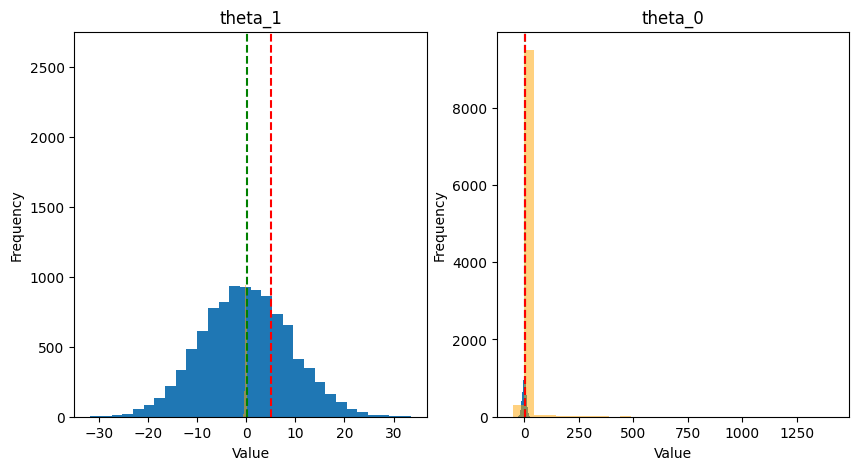

In [59]:

# x_obs_scale = (x_obs - x_mean_norm1) / x_scale_norm1

posterior_samples = post_sample.apply(post_params, key=next(prng_seq), 
                                      num_samples=sim_samples, 
                                      shift=shift, scale=scale, 
                                      x=x_obs_scale,
                                      xi=xi_params['xi'][None,:]/10.)

plot_samples(prior_samples, posterior_samples, true_theta)


(array([4.00e+00, 9.74e+03, 3.10e+01, 3.30e+01, 3.20e+01, 2.30e+01,
        1.90e+01, 1.70e+01, 1.80e+01, 7.00e+00, 1.10e+01, 9.00e+00,
        8.00e+00, 5.00e+00, 6.00e+00, 3.00e+00, 1.00e+00, 4.00e+00,
        5.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 4.00e+00, 3.00e+00,
        0.00e+00, 4.00e+00, 1.00e+00, 0.00e+00, 4.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([ -51.13566971,  -21.76119614,    7.61327744,   36.98775101,
          66.36222839,   95.73670197,  125.11117554,  154.48564148,
         183.86012268,  213.23458862,  242.60906982,  271.98355103,
         301.35800171,  330.73248291,  360.10696411,  389.48144531,
         418.855896  ,  448.2303772 ,  477.6048584 ,  506.9793396 ,
         536.3538208 ,  565.72827148,  595.10272217,  624.47723389,
         653.85168

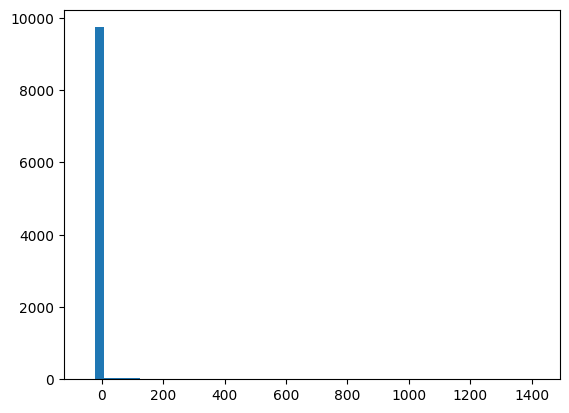

In [61]:
plt.hist(posterior_samples[:,1], bins=50)

In [183]:
xi_params['xi'][None,:]/10.

array([[-0.8669812]], dtype=float32)

In [16]:
jnp.median(inverse_standard_scale(posterior_samples, shift, scale), axis=0)

DeviceArray([-0.687519, -4.631222], dtype=float32)

In [219]:
jnp.mean(posterior_samples, axis=0)

DeviceArray([ 1.5573982, -1.4797395], dtype=float32)

In [158]:
posterior_samples

DeviceArray([[-4.7782743e-03, -1.7775217e+01],
             [ 9.9981701e-01,  7.6073194e-01],
             [ 9.6785158e-01,  1.6329521e-01],
             ...,
             [ 9.4993114e-01, -1.8259058e+00],
             [-8.9996345e-03, -5.4534918e+02],
             [ 9.9998844e-01,  1.2872036e+00]], dtype=float32)

## 10D posteriors

In [17]:
import pickle as pkl

# Unpickling the weights and optimizer state to check things out
# Load the objects.
with open("SNPE_best_10D_params.pkl", "rb") as f:
    loaded_objects = pkl.load(f)

# Retrieve the loaded objects.
post_params_10d = loaded_objects['flow_params']
xi_params_10d = loaded_objects['xi_params']
# loaded_optimizer1_state = loaded_objects['optimizer1']
# loaded_optimizer2_state = loaded_objects['optimizer2']


In [18]:
import jax
import jax.numpy as jnp
import numpy as np
import haiku as hk
import distrax
from lfiax.flows.nsf import make_nsf

from typing import (
    Any,
    Iterator,
    Mapping,
    Optional,
    Tuple,
    Callable,
)

Array = jnp.ndarray
PRNGKey = Array
Batch = Mapping[str, np.ndarray]
OptState = Any

hidden_size = 128
mlp_num_layers = 4
num_bins = 4
flow_num_layers = 5
theta_shape = (2,)
EVENT_SHAPE = (10,)
xi_shape = (10,)


def make_lin_reg_prior():
    theta_shape = (2,)

    mu = jnp.zeros(theta_shape)
    sigma = (3**2) * jnp.ones(theta_shape)

    prior = distrax.Independent(
        distrax.MultivariateNormalDiag(mu, sigma)
    )
    return prior

prng_seq = hk.PRNGSequence(10)
priors = make_lin_reg_prior()
thetas = priors.sample(seed=next(prng_seq), sample_shape=(1_000,))

shift = jnp.mean(thetas, axis=0)
scale = jnp.std(thetas, axis=0)


@jax.jit
def inverse_standard_scale(scaled_x, shift, scale):
    return (scaled_x * scale) + shift

@hk.without_apply_rng
@hk.transform
def post_sample(key: PRNGKey, num_samples: int,
                shift: Array, scale: Array,
                x: Array, xi: Array) -> Array:
    """vi is sampling the posterior distribution so doesn't need
    conditional information. Just uses distrax bijector layers.
    """
    model = make_nsf(
        event_shape=theta_shape,
        num_layers=flow_num_layers,
        hidden_sizes=[hidden_size] * mlp_num_layers,
        num_bins=num_bins,
        standardize_theta=True,
        use_resnet=True,
        conditional=True
    )
    
    # TODO: test this for multiple values of X
    x = jnp.broadcast_to(x, (num_samples, x.shape[-1]))
    xi = jnp.broadcast_to(xi, (num_samples, xi.shape[-1]))

    samples = model._sample_n(key=key, 
                            n=num_samples,
                            theta=x,
                            xi=xi,
                            )
    
    return inverse_standard_scale(samples, shift, scale)
    # return samples


In [27]:
from lfiax.utils.simulators import sim_linear_data_vmap_theta

prior_samples = priors.sample(seed=next(prng_seq), sample_shape=(10,))

x_mean_shift, _, _ = sim_linear_data_vmap_theta(xi_params_10d['xi'], prior_samples, next(prng_seq))

x_mean_norm1 = jnp.mean(x_mean_shift, axis=0)
x_scale_norm1 = jnp.std(x_mean_shift, axis=0)
print(x_mean_norm1)
print(x_scale_norm1)

[  7.5944643   6.4000278   3.4018567  17.78032   -10.885474   24.145153
   3.2681153  -9.247586    7.1743255  18.755    ]
[ 9.955665 10.770859 17.932272 37.936504 63.968735 63.87305  15.014945
 65.41604   9.911021 44.727062]


In [28]:
true_theta = jnp.array([[5,2]])
d_sim = xi_params_10d['xi']
sim_samples = 10_000

prior_samples = priors.sample(seed=next(prng_seq), sample_shape=(sim_samples,))
x_obs, _, _ = sim_linear_data_vmap_theta(d_sim, true_theta, next(prng_seq))

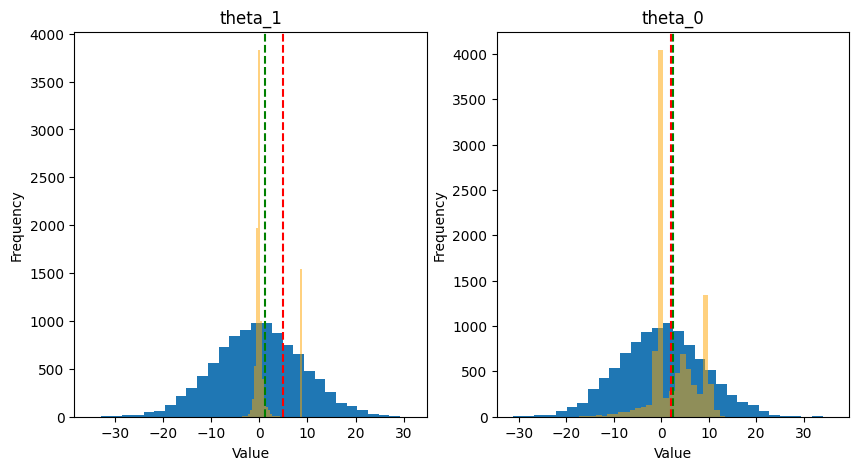

In [42]:

x_obs_scale = (x_obs - x_mean_norm1) / x_scale_norm1

posterior_samples = post_sample.apply(post_params_10d, key=next(prng_seq), 
                                      num_samples=sim_samples, 
                                      shift=shift, scale=scale, 
                                      x=x_obs_scale, 
                                      xi=xi_params_10d['xi'][None,:]/10.)

plot_samples(prior_samples, posterior_samples, true_theta)


In [38]:
jnp.median(inverse_standard_scale(posterior_samples, shift, scale), axis=0)

DeviceArray([-0.6855086, -4.9471493], dtype=float32)

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 5.000e+00,
        1.100e+01, 6.000e+00, 8.000e+00, 1.100e+01, 1.900e+01, 2.000e+01,
        2.400e+01, 3.600e+01, 2.400e+01, 4.700e+01, 4.800e+01, 4.800e+01,
        6.200e+01, 5.900e+01, 6.500e+01, 9.100e+01, 8.200e+01, 6.760e+02,
        3.907e+03, 1.830e+02, 1.270e+02, 1.160e+02, 2.020e+02, 2.520e+02,
        3.780e+02, 4.110e+02, 3.540e+02, 3.040e+02, 2.120e+02, 1.950e+02,
        1.520e+02, 7.700e+02, 6.230e+02, 2.830e+02, 1.090e+02, 4.400e+01,
        1.400e+01, 4.000e+00]),
 array([-22.09568024, -21.38464928, -20.67361832, -19.96258736,
        -19.2515583 , -18.54052734, -17.82949638, -17.11846542,
        -16.40743446, -15.69640446, -14.9853735 , -14.27434254,
        -13.56331253, -12.85228157, -12.14125061, -11.43021965,
        -10.71918964, -10.00815868,  -9.29712772,  -8.58609772,
         -7.87506676,  -7.16403627,  -6.45300531,  -5.74

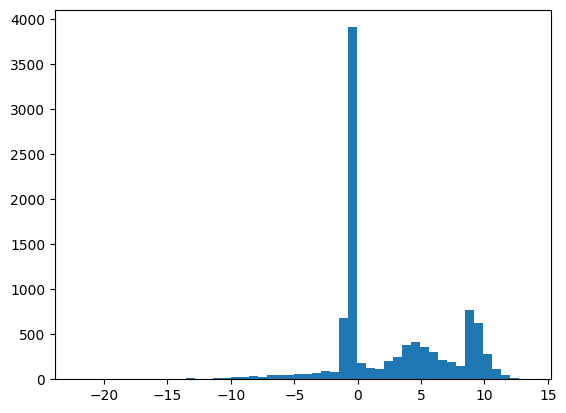

In [44]:
plt.hist(posterior_samples[:,1],bins=50)

(array([2.000e+00, 4.000e+00, 6.000e+00, 1.100e+01, 1.300e+01, 2.300e+01,
        3.100e+01, 7.900e+01, 1.120e+02, 2.000e+02, 3.870e+02, 9.180e+02,
        1.996e+03, 2.482e+03, 8.330e+02, 4.390e+02, 2.520e+02, 1.820e+02,
        9.700e+01, 8.200e+01, 5.400e+01, 3.800e+01, 2.300e+01, 2.100e+01,
        8.000e+00, 7.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.680e+03]),
 array([-3.35406518, -3.10980415, -2.86554289, -2.62128186, -2.37702084,
        -2.13275957, -1.88849854, -1.64423752, -1.39997637, -1.15571535,
        -0.9114542 , -0.66719311, -0.422932  , -0.17867091,  0.06559019,
         0.30985129,  0.55411237,  0.79837346,  1.04263461,  1.28689563,
         1.53115678,  1.77541792,  2.01967907,  2.2639401 ,  2.50820112,
         2.

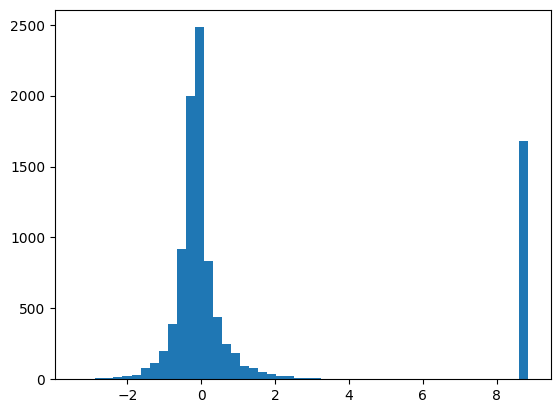

In [37]:
plt.hist(posterior_samples[:,0],bins=50)

# Evaluating Designs

In [ ]:
import numpy as np
import re

# Filter the dataframe for num_designs == 10
df_10 = final_df[final_df['num_designs'] == '10'].copy()

# Define a helper function to extract float values from a string
def extract_floats(arr_string):
    if not isinstance(arr_string, str):
        return arr_string
    float_strings = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', arr_string)
    return [float(f) for f in float_strings]

# Convert the 'Xi' column to a list of floats
df_10['Xi'] = df_10['Xi'].apply(extract_floats)

## Evaluating 10D designs

In [17]:
import numpy as np
import re

# Filter the dataframe for num_designs == 10
df_10 = final_df[final_df['num_designs'] == '10'].copy()

# Define a helper function to extract float values from a string
def extract_floats(arr_string):
    if not isinstance(arr_string, str):
        return arr_string
    float_strings = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', arr_string)
    return [float(f) for f in float_strings]

# Convert the 'Xi' column to a list of floats
df_10['Xi'] = df_10['Xi'].apply(extract_floats)

In [23]:
df_10['Xi'].head()
# df_10.head()

100000    [-0.89956284, -8.381839, 9.840965, 7.27334, -7...
100001    [-0.82514995, -8.307426, 9.766552, 7.347753, -...
100002    [-0.78277177, -8.242616, 9.689036, 7.433385, -...
100003    [-0.7151857, -8.290401, 9.604308, 7.524459, -7...
100004    [-0.65738386, -8.329324, 9.516716, 7.5453367, ...
Name: Xi, dtype: object

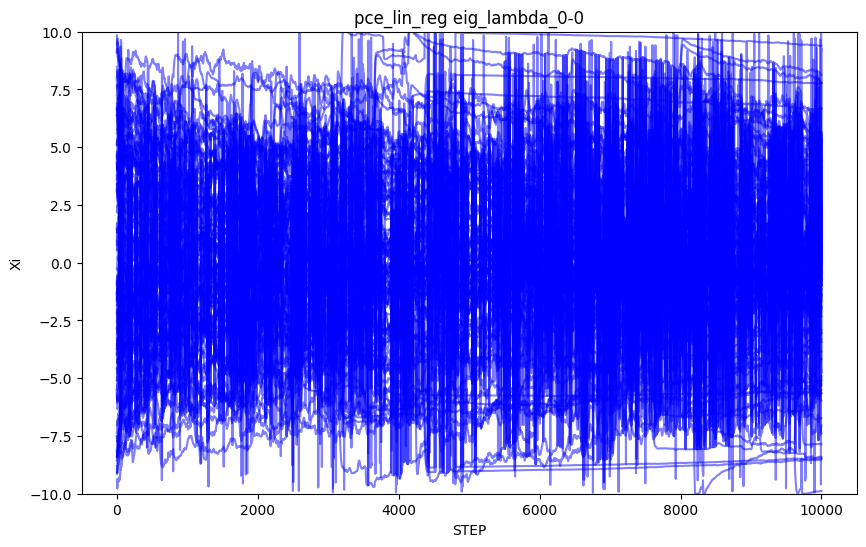

In [24]:
import matplotlib.pyplot as plt
import numpy as np

alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'eig_lambda_0-0'): 'blue',
    # Add more pairs as needed with their corresponding colors
}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

boed_type_to_plot = 'pce_lin_reg'
lambda_subdir_to_plot = 'eig_lambda_0-0'

group = df_10[(df_10['boed_type'] == boed_type_to_plot) & (df_10['lambda_subdir'] == lambda_subdir_to_plot)]

for _, seed_group in group.groupby('seed'):
    seed_group = seed_group.sort_values('STEP')  # Sort seed_group by 'STEP'
    steps = seed_group['STEP'].values
    xi_list = seed_group['Xi'].tolist()  # Extract the Xi lists
    
    for i in range(len(xi_list[0])):  # Assuming all Xi lists have the same length
        xi_values = [xi[i] for xi in xi_list]
        ax.plot(steps, xi_values, color=color_map[(boed_type_to_plot, lambda_subdir_to_plot)], alpha=alpha_value)

ax.set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot}')
ax.set_xlabel('STEP')
ax.set_ylabel('Xi')
ax.set_ylim([-10, 10])

plt.show()


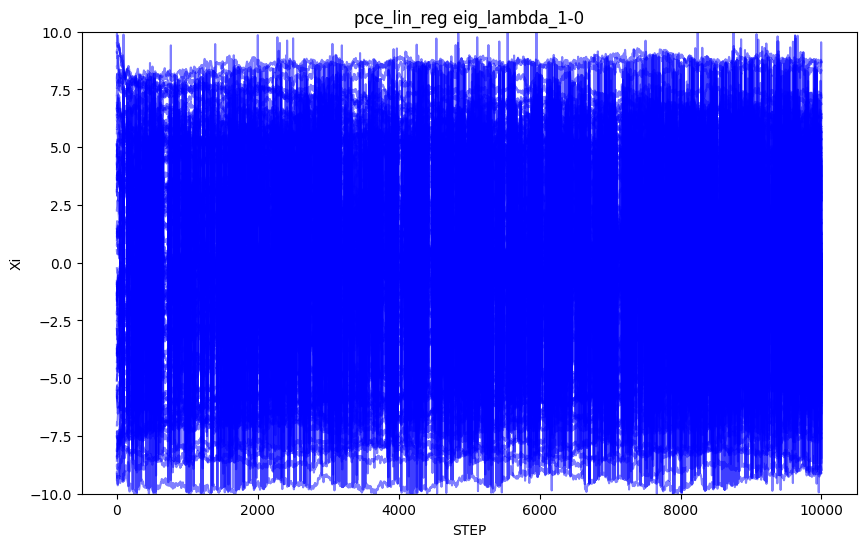

In [25]:
alpha_value = 0.5  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'eig_lambda_1-0'): 'blue',
    # Add more pairs as needed with their corresponding colors
}

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

boed_type_to_plot = 'pce_lin_reg'
lambda_subdir_to_plot = 'eig_lambda_1-0'

group = df_10[(df_10['boed_type'] == boed_type_to_plot) & (df_10['lambda_subdir'] == lambda_subdir_to_plot)]

for _, seed_group in group.groupby('seed'):
    seed_group = seed_group.sort_values('STEP')  # Sort seed_group by 'STEP'
    steps = seed_group['STEP'].values
    xi_list = seed_group['Xi'].tolist()  # Extract the Xi lists
    
    for i in range(len(xi_list[0])):  # Assuming all Xi lists have the same length
        xi_values = [xi[i] for xi in xi_list]
        ax.plot(steps, xi_values, color=color_map[(boed_type_to_plot, lambda_subdir_to_plot)], alpha=alpha_value)

ax.set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot}')
ax.set_xlabel('STEP')
ax.set_ylabel('Xi')
ax.set_ylim([-10, 10])

plt.show()


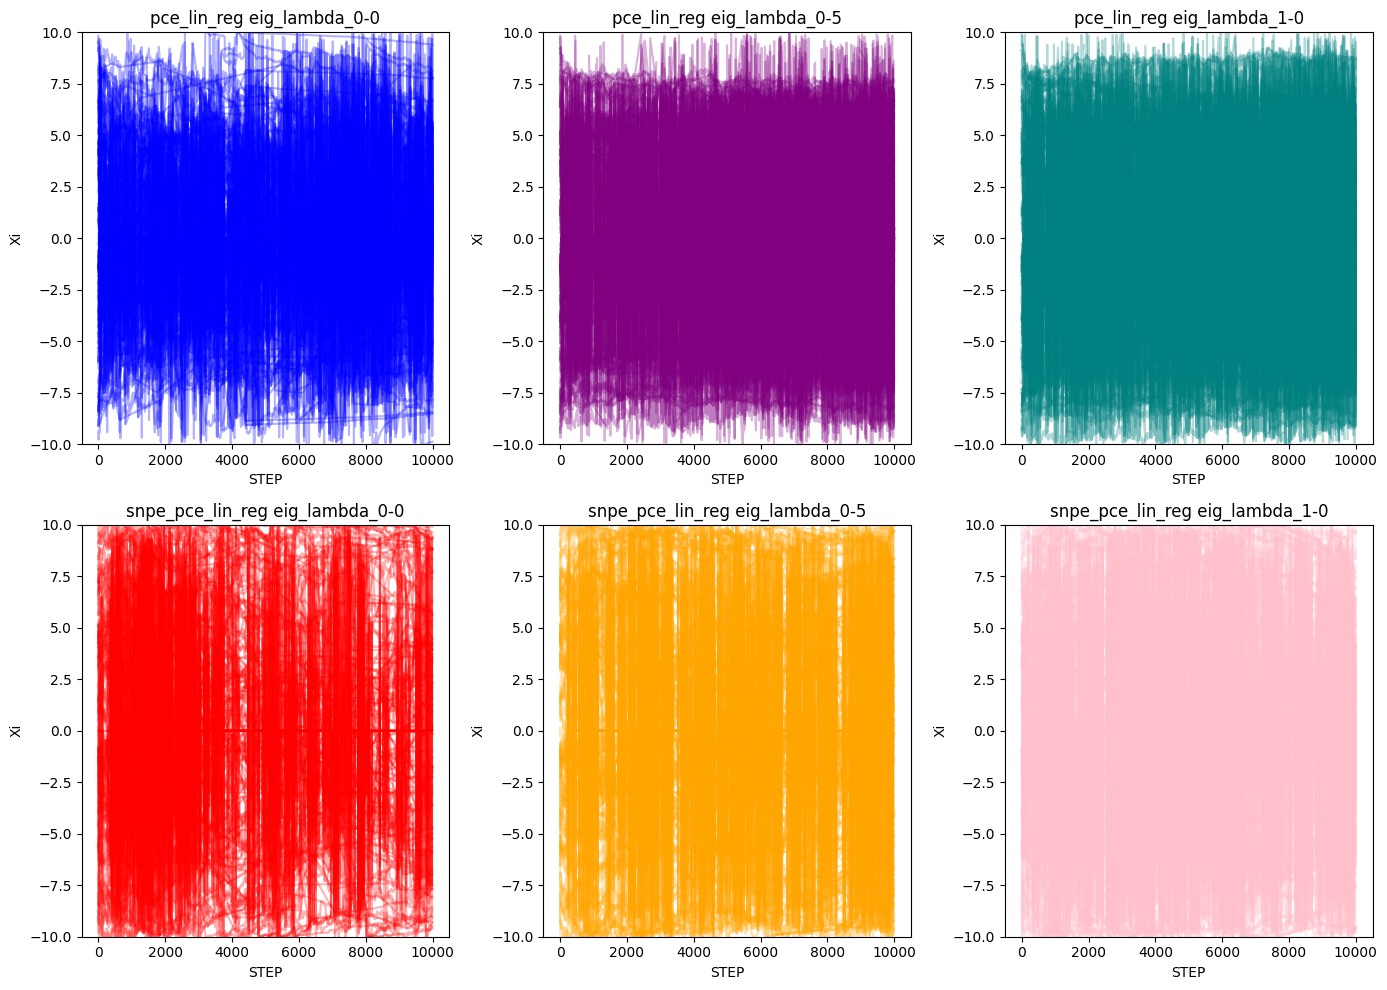

In [30]:
import itertools

alpha_value = 0.3  # Adjust this value for desired transparency

# Define a color map for 'boed_type' and 'lambda_subdir' pairs
color_map = {
    ('pce_lin_reg', 'eig_lambda_0-0'): 'blue',
    ('pce_lin_reg', 'eig_lambda_0-5'): 'purple',
    ('pce_lin_reg', 'eig_lambda_1-0'): 'teal',
    # ('pce_lin_reg', 'real_lambda_1'): 'green',
    ('snpe_pce_lin_reg', 'eig_lambda_0-0'): 'red',
    ('snpe_pce_lin_reg', 'eig_lambda_0-5'): 'orange',
    ('snpe_pce_lin_reg', 'eig_lambda_1-0'): 'pink',
    # ('snpe_pce_lin_reg', 'real_lambda_1'): 'lime',
    
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = list(itertools.chain.from_iterable(axes))  # Flatten the axes list

for (boed_type, lambda_subdir), ax in zip(color_map.keys(), axes):
    group = df_10[(df_10['boed_type'] == boed_type) & (df_10['lambda_subdir'] == lambda_subdir)]

    for _, seed_group in group.groupby('seed'):
        seed_group = seed_group.sort_values('STEP')  # Sort seed_group by 'STEP'
        steps = seed_group['STEP'].values
        xi_list = seed_group['Xi'].tolist()  # Extract the Xi lists
        
        num_points = max(len(xi) for xi in xi_list if isinstance(xi, list))

        for i in range(num_points):  # Loop through all data points
            xi_values = [xi[i] for xi in xi_list if isinstance(xi, list) and len(xi) > i]  # Extract only available data points
            steps_with_data = [step for step, xi in zip(steps, xi_list) if isinstance(xi, list) and len(xi) > i]
            ax.plot(steps_with_data, xi_values, color=color_map[(boed_type, lambda_subdir)], alpha=alpha_value)


    ax.set_title(f'{boed_type} {lambda_subdir}')
    ax.set_xlabel('STEP')
    ax.set_ylabel('Xi')
    ax.set_ylim([-10, 10])

plt.tight_layout()
plt.show()


## Evaluating 100D Designs

Really just want to look at some of the designs.

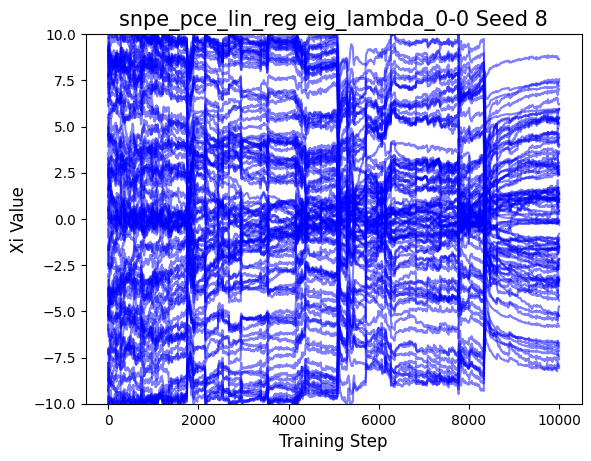

In [32]:
import numpy as np

color_map = {
    ('pce_lin_reg', 'eig_lambda_0-0'): 'blue',
    ('pce_lin_reg', 'eig_lambda_0-5'): 'purple',
    ('pce_lin_reg', 'eig_lambda_1-0'): 'teal',
    # ('pce_lin_reg', 'real_lambda_1'): 'green',
    ('snpe_pce_lin_reg', 'eig_lambda_0-0'): 'red',
    ('snpe_pce_lin_reg', 'eig_lambda_0-5'): 'oranges',
    ('snpe_pce_lin_reg', 'eig_lambda_1-0'): 'pink',
    # ('snpe_pce_lin_reg', 'real_lambda_1'): 'lime',
}

boed_type_to_plot = 'snpe_pce_lin_reg'
lambda_subdir_to_plot = 'eig_lambda_0-0'
seed_to_plot = '8'

# Filter the DataFrame for the desired boed_type, lambda_subdir, and num_designs
filtered_df =final_df[(final_df['boed_type'] == boed_type_to_plot) & (final_df['lambda_subdir'] == lambda_subdir_to_plot) & (final_df['num_designs'] == '100') & (final_df['seed'] == seed_to_plot)]

# Sort filtered_df by 'STEP'
filtered_df = filtered_df.sort_values('STEP')

# Create a figure and axis object
fig, ax = plt.subplots()

steps = filtered_df['STEP'].values
xi_list = filtered_df['Xi'].tolist()  # Extract the Xi lists

# Convert string elements to lists of floats
xi_list = [list(map(float, re.findall(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', xi))) if isinstance(xi, str) else xi for xi in xi_list]

# Check if there are any list elements in xi_list
if any(isinstance(xi, list) for xi in xi_list):
    # Filter out non-list elements and find the maximum length
    num_points = max(len(xi) for xi in xi_list if isinstance(xi, list))

    for i in range(num_points):  # Loop through all data points
        xi_values = [xi[i] for xi in xi_list if isinstance(xi, list) and len(xi) > i]  # Extract only available data points
        ax.plot(steps, xi_values, color='blue', alpha=0.5)

# Set plot title, legend, and axis labels
ax.set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot} Seed {seed_to_plot}', fontsize=15)
ax.set_xlabel('Training Step', fontsize=12)
ax.set_ylabel('Xi Value', fontsize=12)
ax.set_ylim([-10, 10])

# Show the plot
plt.show()


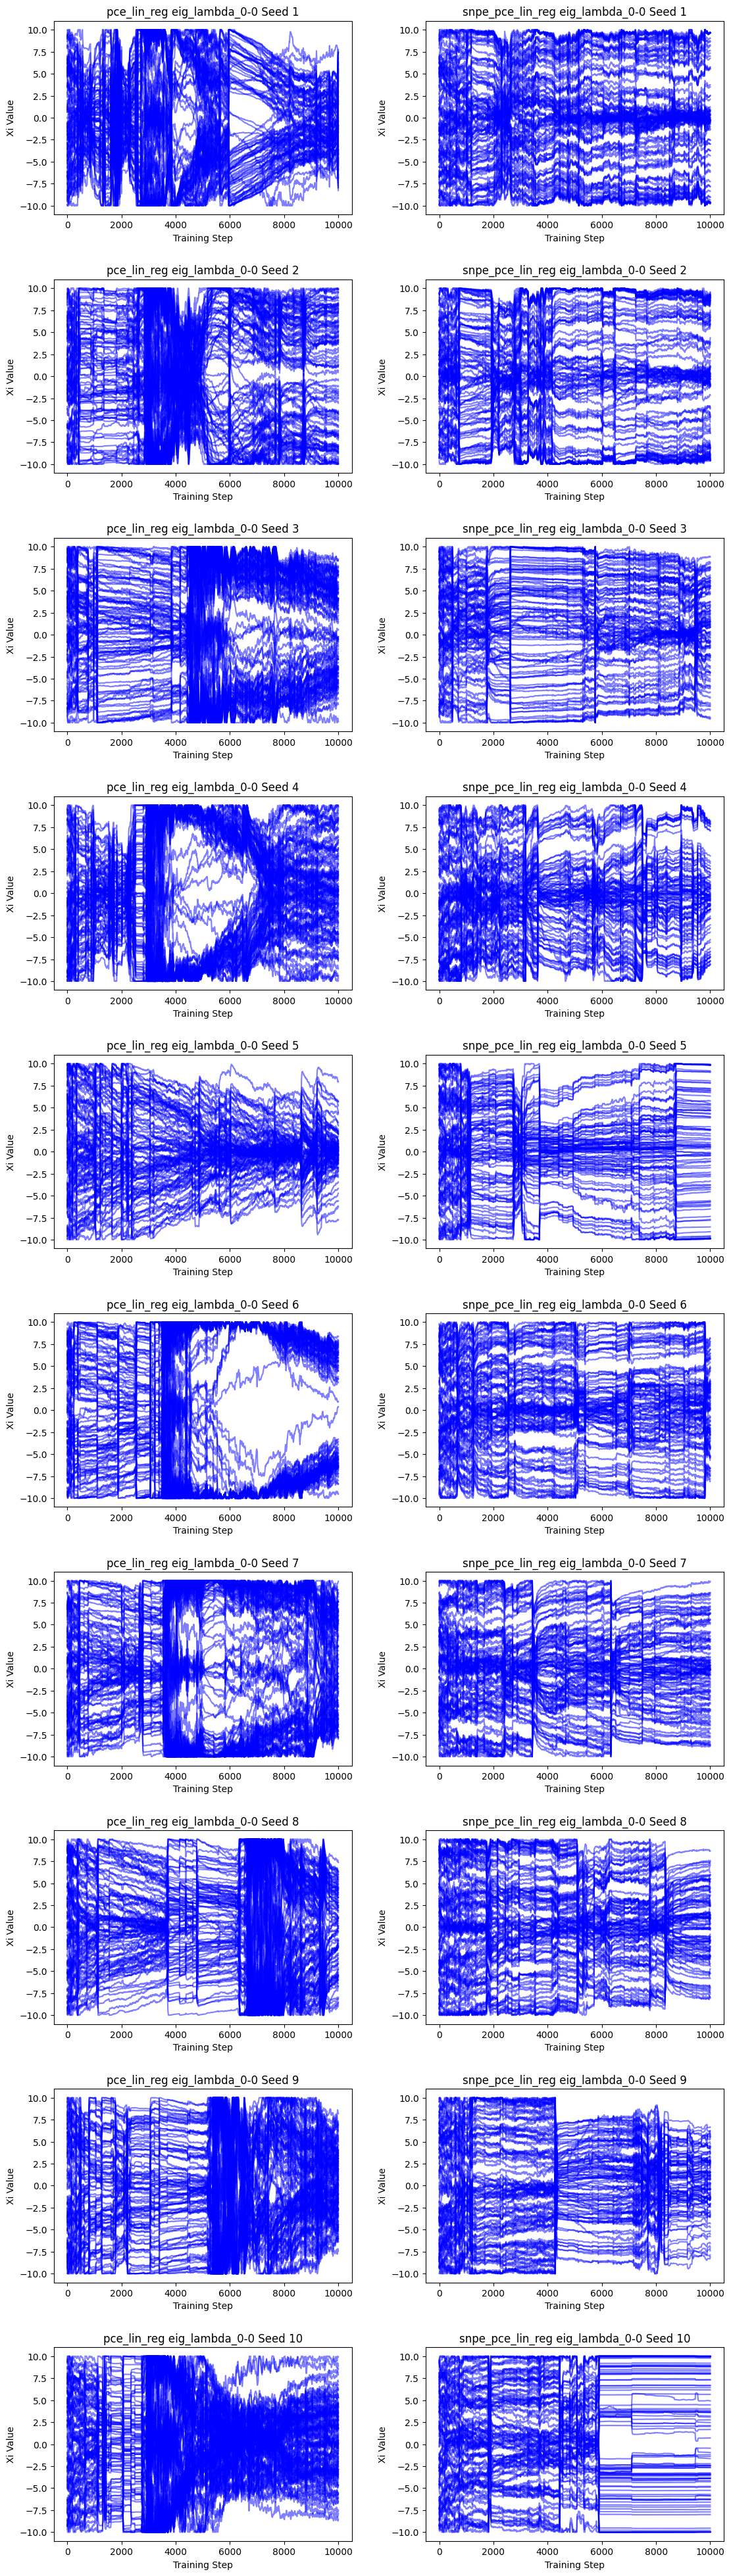

In [35]:
import numpy as np
import re
import matplotlib.pyplot as plt

lambda_subdir_to_plot = 'eig_lambda_0-0'
num_seeds = 10
boed_types = ['pce_lin_reg', 'snpe_pce_lin_reg']

# Create a 10x2 grid of subplots
fig, axes = plt.subplots(num_seeds, 2, figsize=(12, 40))
fig.tight_layout(pad=5)

# Iterate through each boed_type and seed combination
for boed_type_idx, boed_type_to_plot in enumerate(boed_types):
    for seed_to_plot in range(1, num_seeds + 1):
        # Filter the DataFrame for the desired boed_type, lambda_subdir, and seed
        filtered_df =final_df[(final_df['boed_type'] == boed_type_to_plot) & (final_df['lambda_subdir'] == lambda_subdir_to_plot) & (final_df['num_designs'] == '100') & (final_df['seed'] == str(seed_to_plot))]

        # Sort filtered_df by 'STEP'
        filtered_df = filtered_df.sort_values('STEP')

        steps = filtered_df['STEP'].values
        xi_list = filtered_df['Xi'].tolist()  # Extract the Xi lists

        # Convert string elements to lists of floats
        xi_list = [list(map(float, re.findall(r'[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?', xi))) if isinstance(xi, str) else xi for xi in xi_list]

        # Check if there are any list elements in xi_list
        if any(isinstance(xi, list) for xi in xi_list):
            # Filter out non-list elements and find the maximum length
            num_points = max(len(xi) for xi in xi_list if isinstance(xi, list))

            for i in range(num_points):  # Loop through all data points
                xi_values = [xi[i] for xi in xi_list if isinstance(xi, list) and len(xi) > i]  # Extract only available data points
                axes[seed_to_plot - 1, boed_type_idx].plot(steps, xi_values, color='blue', alpha=0.5)

        # Set plot title, legend, and axis labels
        axes[seed_to_plot - 1, boed_type_idx].set_title(f'{boed_type_to_plot} {lambda_subdir_to_plot} Seed {seed_to_plot}', fontsize=12)
        axes[seed_to_plot - 1, boed_type_idx].set_xlabel('Training Step', fontsize=10)
        axes[seed_to_plot - 1, boed_type_idx].set_ylabel('Xi Value', fontsize=10)

# Show the plot
plt.show()
